In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Aprendizaje supervisado parte 2 -- Regresión

En regresión intentamos predecir una variable continua de salida -- al contrario que las variables nominales que predecíamos en los ejemplos anteriores de clasificación.

Vamos a empezar con un ejemplo simple de juguete con una sola dimensión de entrada (variable explicativa) y una variable objetivo. Crearemos un dataset mediante una curva sinusoidal con algo de ruido:

In [96]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [97]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

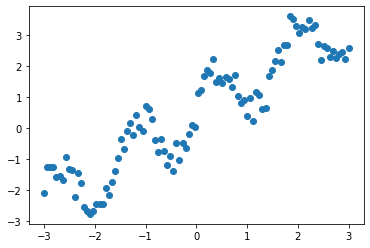

In [98]:
plt.plot(x, y, 'o');

Regresión lineal
=================

El primer modelo que vamos a introducir es el llamado regresión lineal simple, que simplemente predice que los datos caen en una línea recta. Una forma de ajustar este modelo es usar `LinearRegression` (también conocido como regresión [*Ordinary Least Squares (OLS)*](https://en.wikipedia.org/wiki/Ordinary_least_squares)).
La interfaz para LinearRegression es exactamente la misma que para los clasificadores explorados anteriormente, con la salvedad de que ahora $y$ contiene valores reales, en lugar de valores categóricos.

Como recordaremos, el API de scikit-learn requiere que le pasemos la variable objetivo ($y$) como un array de 1 dimensión; el API de scikit-learn espera que los ejemplos ($\mathbf{X}$) vengan en forma de un array de dos dimensiones (aunque solo haya una columna o característica). Por tanto, debemos convertir el array NumPy $x$ de una dimensión a una matriz $\mathbf{X}$ con dos ejes:


In [99]:
print('Antes: ', x.shape)
X = x[:, np.newaxis]
print('Después: ', X.shape)

Antes:  (100,)
Después:  (100, 1)


De nuevo dividimos nuestro dataset en entrenamiento (75%) y test (25%):

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Ahora usamos el algoritmo `LinearRegression` para **ajustar un modelo de regresión a los datos de entrenamiento**:

In [101]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(n_jobs=2)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=False)

Después del ajuste, podemos observar los parámetros obtenidos.

In [102]:
print('Pesos: ', regressor.coef_)
print('Ordenada en el origen: ', regressor.intercept_)

Pesos:  [0.90211711]
Ordenada en el origen:  0.44840974988268


Ya que nuestro modelo de regresión es lineal, la relación entre la variable objetivo ($y$) y la variable independiente ($x$) se define como:

$$y = peso \times x + \text{ordenadaOrigen}$$

Para representar el modelo, introducimos los valores máximo y mínimo de $x$ en esta ecuación.

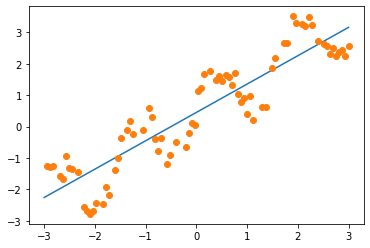

In [103]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

De la misma forma que con los estimadores de clasificación, utilizamos el método `predict` para obtener valores estimados de la variable objetivo. Y esperamos que esos valores caigan en la línea anterior:

In [104]:
y_pred_train = regressor.predict(X_train)

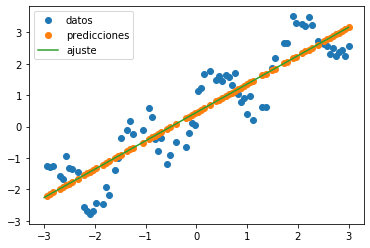

In [105]:
plt.plot(X_train, y_train, 'o', label="datos")
plt.plot(X_train, y_pred_train, 'o', label="predicciones")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='ajuste')
plt.legend(loc='best')

Como podemos ver en el gráfico, la línea es capaz de capturar la pendiente general de los datos, pero no muchos detalles.

Ahora vamos a probar con el conjunto de test:

In [106]:
y_pred_test = regressor.predict(X_test)

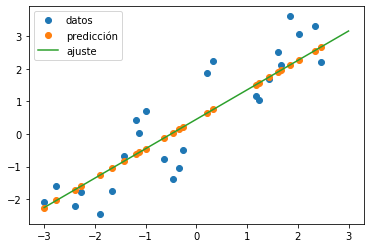

In [107]:
plt.plot(X_test, y_test, 'o', label="datos")
plt.plot(X_test, y_pred_test, 'o', label="predicción")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='ajuste')
plt.legend(loc='best');

De nuevo, scikit-learn proporciona un método fácil para evaluar cuantitativamente los estimadores de regresión a través de la función ``score``. Para tareas de regresión, este sería por defecto el R<sup>2</sup>. Otra forma popular de evaluación sería el *Mean Squared Error* (MSE). Como indica su nombre, el MSE consiste simplemente en la diferencia al cuadrado promediada entre los valores predichos y los valores reales:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [108]:
regressor.score(X_test, y_test)

0.7994321405079685

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Añade una característica que consista en `sin(4x)` a la matriz `X` y vuelve a ajustar el modelo. Visualiza las predicciones con este modelo más complejo, aunque aún lineal.
      </li>
    </ul>
</div>

In [109]:
X1 = x[:, np.newaxis]
x2 = np.sin(4 * x)
X2 = x2[:, np.newaxis]

X1 = np.append(X1, X2, axis=1)
X1.shape

(100, 2)

In [110]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=42)

regressor = LinearRegression(n_jobs=2)
regressor.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=False)

In [111]:
print('Pesos: ', regressor.coef_)
print('Ordenada en el origen: ', regressor.intercept_)

Pesos:  [0.99030306 1.0129967 ]
Ordenada en el origen:  0.45963936282957546


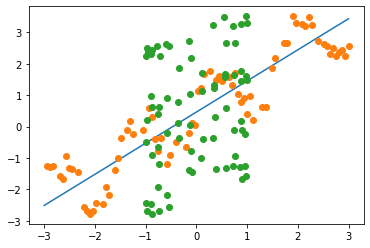

In [112]:
min_pt = X1.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X1.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X1.min(), X1.max()], [min_pt, max_pt])
plt.plot(X1_train, y1_train, 'o');

In [113]:
y1_pred_train = regressor.predict(X1_train)

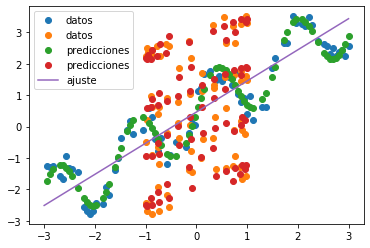

In [114]:
plt.plot(X1_train, y1_train, 'o', label="datos")
plt.plot(X1_train, y1_pred_train, 'o', label="predicciones")
plt.plot([X1.min(), X1.max()], [min_pt, max_pt], label='ajuste')
plt.legend(loc='best')

In [115]:
y1_pred_test = regressor.predict(X1_test)

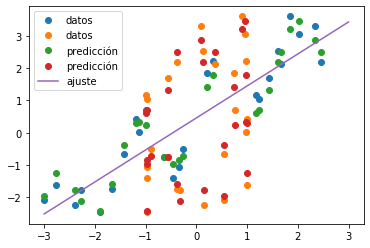

In [116]:
plt.plot(X1_test, y1_test, 'o', label="datos")
plt.plot(X1_test, y1_pred_test, 'o', label="predicción")
plt.plot([X1.min(), X1.max()], [min_pt, max_pt], label='ajuste')
plt.legend(loc='best');

In [117]:
regressor.score(X1_test, y1_test)

0.9660402506947787

KNeighborsRegression
=======================
Del mismo modo que para clasificación, podemos utilizar un método basado en vecinos para regresión. Podemos predecir directamente el valor de la variable objetivo del punto más cercano o podemos promediar varios de los puntos más cercanos. Los métodos basados en vecinos son más populares en clasificación que en regresión, pese a lo cual es un método sencillo que puede servir como *baseline*.

In [118]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

De nuevo, vamos a comprobar como se comporta en entrenamiento y en test:

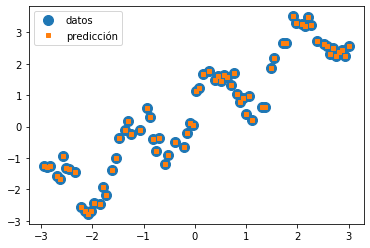

In [119]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="datos", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="predicción", markersize=4)
plt.legend(loc='best');

En entrenamiento, la predicción es perfecta, ya que cada ejemplo es su vecino más cercano.

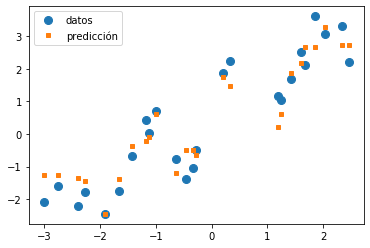

In [120]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="datos", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="predicción", markersize=4)
plt.legend(loc='best');

En el conjunto de test, capturamos mejor la variación de los datos que con el modelo lineal, aunque nuestro estimador haga algunas cosas *un poco raras*. Evaluemos la puntuación R<sup>2</sup>:

In [121]:
kneighbor_regression.score(X_test, y_test)

0.9166293022467948

Es mucho mejor que antes. El problema era que un modelo lineal no era un ajuste adecuado para el problema, ya que no tenía la suficiente complejidad e infra-entrenaba los datos (error alto por sesgo).

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Compara KNeighborsRegressor y LinearRegression en el dataset boston housing. Puedes cargar el dataset utilizando ``sklearn.datasets.load_boston``. Puedes saber más de este dataset observando el atributo ``DESCR`` del objeto resultante.
      </li>
    </ul>
</div>

In [124]:
from sklearn.datasets import load_boston

boston = load_boston()

In [126]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [139]:
X_b, y_b = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X_b, y_b,
                                                    test_size=0.25,
                                                    random_state=1234)

In [175]:
kneighbor_regression = KNeighborsRegressor(n_neighbors=5)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

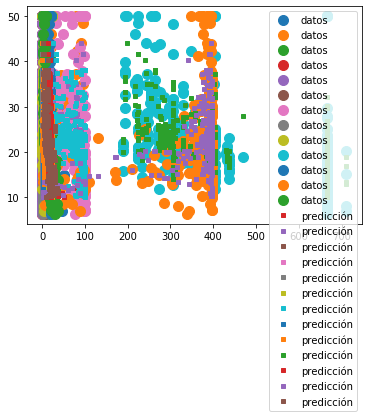

In [176]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="datos", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="predicción", markersize=4)
plt.legend(loc='best');

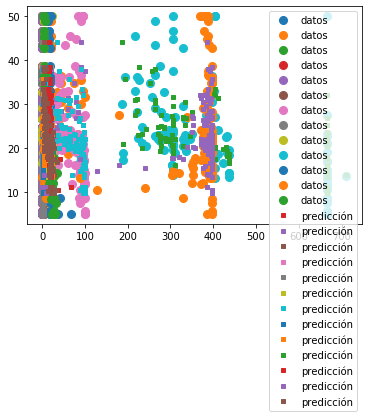

In [177]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="datos", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="predicción", markersize=4)
plt.legend(loc='best');

In [178]:
kneighbor_regression.score(X_test, y_test)

0.5544018743476793

In [144]:
regressor = LinearRegression(n_jobs=2)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=False)

In [147]:
print('Pesos: ', regressor.coef_)
print('Ordenada en el origen: ', regressor.intercept_)

Pesos:  [-9.70341820e-02  6.31133687e-02 -1.41118921e-02  2.84299322e+00
 -2.18920156e+01  2.41452999e+00  2.39658929e-03 -1.88925109e+00
  3.56352826e-01 -1.28011290e-02 -1.05894185e+00  1.01171710e-02
 -5.63174445e-01]
Ordenada en el origen:  50.82795890599995


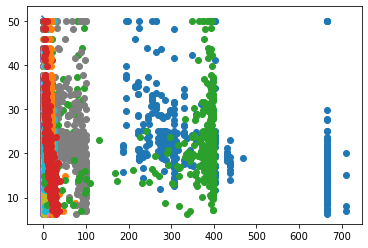

In [148]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

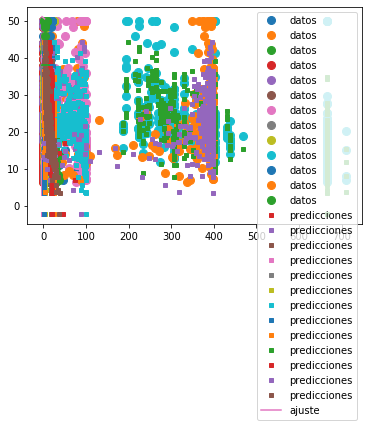

In [181]:
y_pred_train = regressor.predict(X_train)

plt.plot(X_train, y_train, 'o', label="datos", markersize=8)
plt.plot(X_train, y_pred_train, 's', label="predicciones", markersize=4)
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='ajuste')
plt.legend(loc='best')

In [150]:
y_pred_test = regressor.predict(X_test)

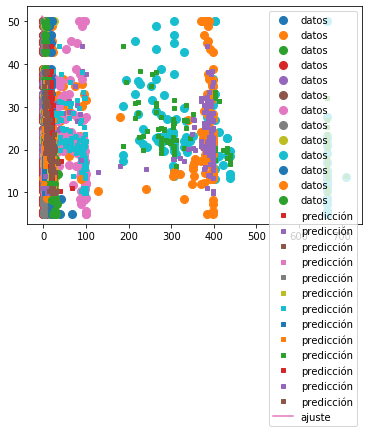

In [182]:
plt.plot(X_test, y_test, 'o', label="datos", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="predicción", markersize=4)
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='ajuste')
plt.legend(loc='best');

In [184]:
regressor.score(X_test, y_test)

0.7325732922440741